# Task 1 - *"The Fingerprint"*

Here, I'm going to analyse the the *"mathematics of authorship"*, i.e. how to mathematically differentiate between human and AI generated text. I have done a review into various methods of mathematically differentiate between 2 texts, and what generally tends to stand out in AI.

As such, I have met the baseline requirements given in the document, and additionally added a few of my own tests for mathematical distinctions. Every single test I do will be thoroughly explained in the markdown pieces before each codeblock.

## Lexical Richness

From my understanding, lexical richness is a mathematical distinction which regards the distinction of vocabulary. Generally, LLM's are trained on datasets with billions of tokens. Their algorithms usually rely on temperature scaled sampling, so the LLM's are statistically incentivised to generate the same token. This is called a *"lexical plateau."* We do not expect to see such a plateau as much in the human written text. 

### 1. Type-Token Ratios (TTR)

**What is it:** The ratio of unique words to total words in a given text.  

**Why are we using it?**  
It seems to be quite a good proxy for lexical richness. In human writing, the TTR is a dynamic function which is based on the intention of the writer. A non-fiction highly academic book will likely have a high TTR, whereas a children's story will have a low one.
My main point is that you can expect there to be diversity for the human authors.

For AI though, it's different. LLM's tend to restrict themselves to smaller vocabulary samples and continuously use that. For instance, in the domain of journalistic writing, human articles typically maintain a standard TTR in the range of 0.53 to 0.58. In contrast, AI-generated counterparts consistently fall into a lower band, typically between 0.45 and 0.52.<sup>[2]</sup>

Where I learned about type-token ratios:
1. [Culda et al., 2024](https://www.tandfonline.com/doi/full/10.1080/09540091.2025.2507183?src#d1e751) speaks about TTR and evaluates it robustly against human-written text. This can be seen primarily in section 4.4 of the paper. They discuss the results of this in section 6 of the paper, stating *For instance, GPT-Neo and BloomZ produced fewer unique words and had a lower TTR compared to human-authored texts. In contrast, Wikipedia, blog and scientific content exhibited a larger word count and more diverse syntactic patterns, reflecting the authors’ ability to incorporate personal experiences, emotional undertones, and stylistic subtleties.*
2. [Tran et al., 2024](https://www.mdpi.com/2073-431X/13/12/328?utm_source=researchgate.net&utm_medium=article) speaks about how AI generated text varies from that of humans in terms of lexical richness. The above example I used about TTR of AI falling into a median lower band, is from here.

#### My Hypothesis

Texts produced by AI will show lower Type–Token Ratio, TTR than human-authored texts on average. That of class 1 and class 3 will be similar.  

I will use the Mann-Whitney U Test to test this hypothesis. This is a test comparing differences between two independent data classes to determine if they originate from the same distribution.

In [16]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import re

sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 11

# Use relative path - works when notebook is in task-1/ directory
DATASET_DIR = Path('../dataset')
print(f"Using dataset directory: {DATASET_DIR.resolve()}")

def calculate_ttr(text):
    # Here, we calculate Type-Token Ratio for a given text.
    # TTR = (Number of unique words) / (Total number of words)
    # For example, in the sentence "The cat chased the mouse and the cat caught the mouse."
    # Total words = 11, unique words = 6. Hence, TTR = 6/11=0.54.  
    

    # Convert text to lowercase and extract words
    words = re.findall(r'\b[a-z]+\b', text.lower())
    
    if len(words) == 0:
        return 0.0
    
    unique_words = len(set(words))
    total_words = len(words)
    
    return unique_words / total_words

def load_paragraphs_from_directory(directory_path, class_name):

    data = []
    
    # Get all .txt files in the directory
    txt_files = glob.glob(os.path.join(str(directory_path), '*.txt'))
    
    print(f"  Checking {directory_path}: found {len(txt_files)} files")
    
    for file_path in txt_files:
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                text = f.read().strip()
            
            if text:  # Only process non-empty files
                ttr = calculate_ttr(text)
                word_count = len(re.findall(r'\b[a-z]+\b', text.lower()))
                
                data.append({
                    'class': class_name,
                    'file': os.path.basename(file_path),
                    'ttr': ttr,
                    'word_count': word_count
                })
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
    
    return pd.DataFrame(data)

def load_class1_data():
    base_path = DATASET_DIR / 'class1-human-written'
    authors = [
        '01-arthur-conan-doyle',
        '02-pg-wodehouse',
        '03-mark-twain',
        '04-william-shakespeare'
    ]
    
    print(f"Loading Class 1 from: {base_path}")
    all_data = []
    for author in authors:
        path = base_path / author / 'extracted_paragraphs'
        df = load_paragraphs_from_directory(path, 'Class 1: Human-written')
        all_data.append(df)
    
    return pd.concat(all_data, ignore_index=True) if all_data else pd.DataFrame()

def load_class2_data():
    path = DATASET_DIR / 'class2-ai-written' / 'ai-generated-paragraphs'
    print(f"Loading Class 2 from: {path}")
    return load_paragraphs_from_directory(path, 'Class 2: AI-written')

def load_class3_data():
    base_path = DATASET_DIR / 'class3-ai-mimicry'
    authors = [
        '01-arthur-conan-doyle',
        '02-pg-wodehouse',
        '03-mark-twain',
        '04-william-shakespeare'
    ]
    
    print(f"Loading Class 3 from: {base_path}")
    all_data = []
    for author in authors:
        path = base_path / author
        df = load_paragraphs_from_directory(path, 'Class 3: AI-mimicry')
        all_data.append(df)
    
    return pd.concat(all_data, ignore_index=True) if all_data else pd.DataFrame()

# Load all data
print("Loading data from the 3 classes\n")
df_class1 = load_class1_data()
df_class2 = load_class2_data()
df_class3 = load_class3_data()
print(f"Done :)")

print("DATA LOADING COMPLETE")


Using dataset directory: /home/samarth/Documents/precog-task/human-or-ai/dataset
Loading data from the 3 classes

Loading Class 1 from: ../dataset/class1-human-written
  Checking ../dataset/class1-human-written/01-arthur-conan-doyle/extracted_paragraphs: found 500 files
  Checking ../dataset/class1-human-written/02-pg-wodehouse/extracted_paragraphs: found 500 files
  Checking ../dataset/class1-human-written/03-mark-twain/extracted_paragraphs: found 480 files
  Checking ../dataset/class1-human-written/04-william-shakespeare/extracted_paragraphs: found 480 files
Loading Class 2 from: ../dataset/class2-ai-written/ai-generated-paragraphs
  Checking ../dataset/class2-ai-written/ai-generated-paragraphs: found 988 files
Loading Class 3 from: ../dataset/class3-ai-mimicry
  Checking ../dataset/class3-ai-mimicry/01-arthur-conan-doyle: found 250 files
  Checking ../dataset/class3-ai-mimicry/02-pg-wodehouse: found 250 files
  Checking ../dataset/class3-ai-mimicry/03-mark-twain: found 237 files
  C

### Comparison 1: Class 1 (Human-written) vs Class 2 (AI-written)

Here, we compare the TTR distributions between genuine human-written text and AI-generated text.

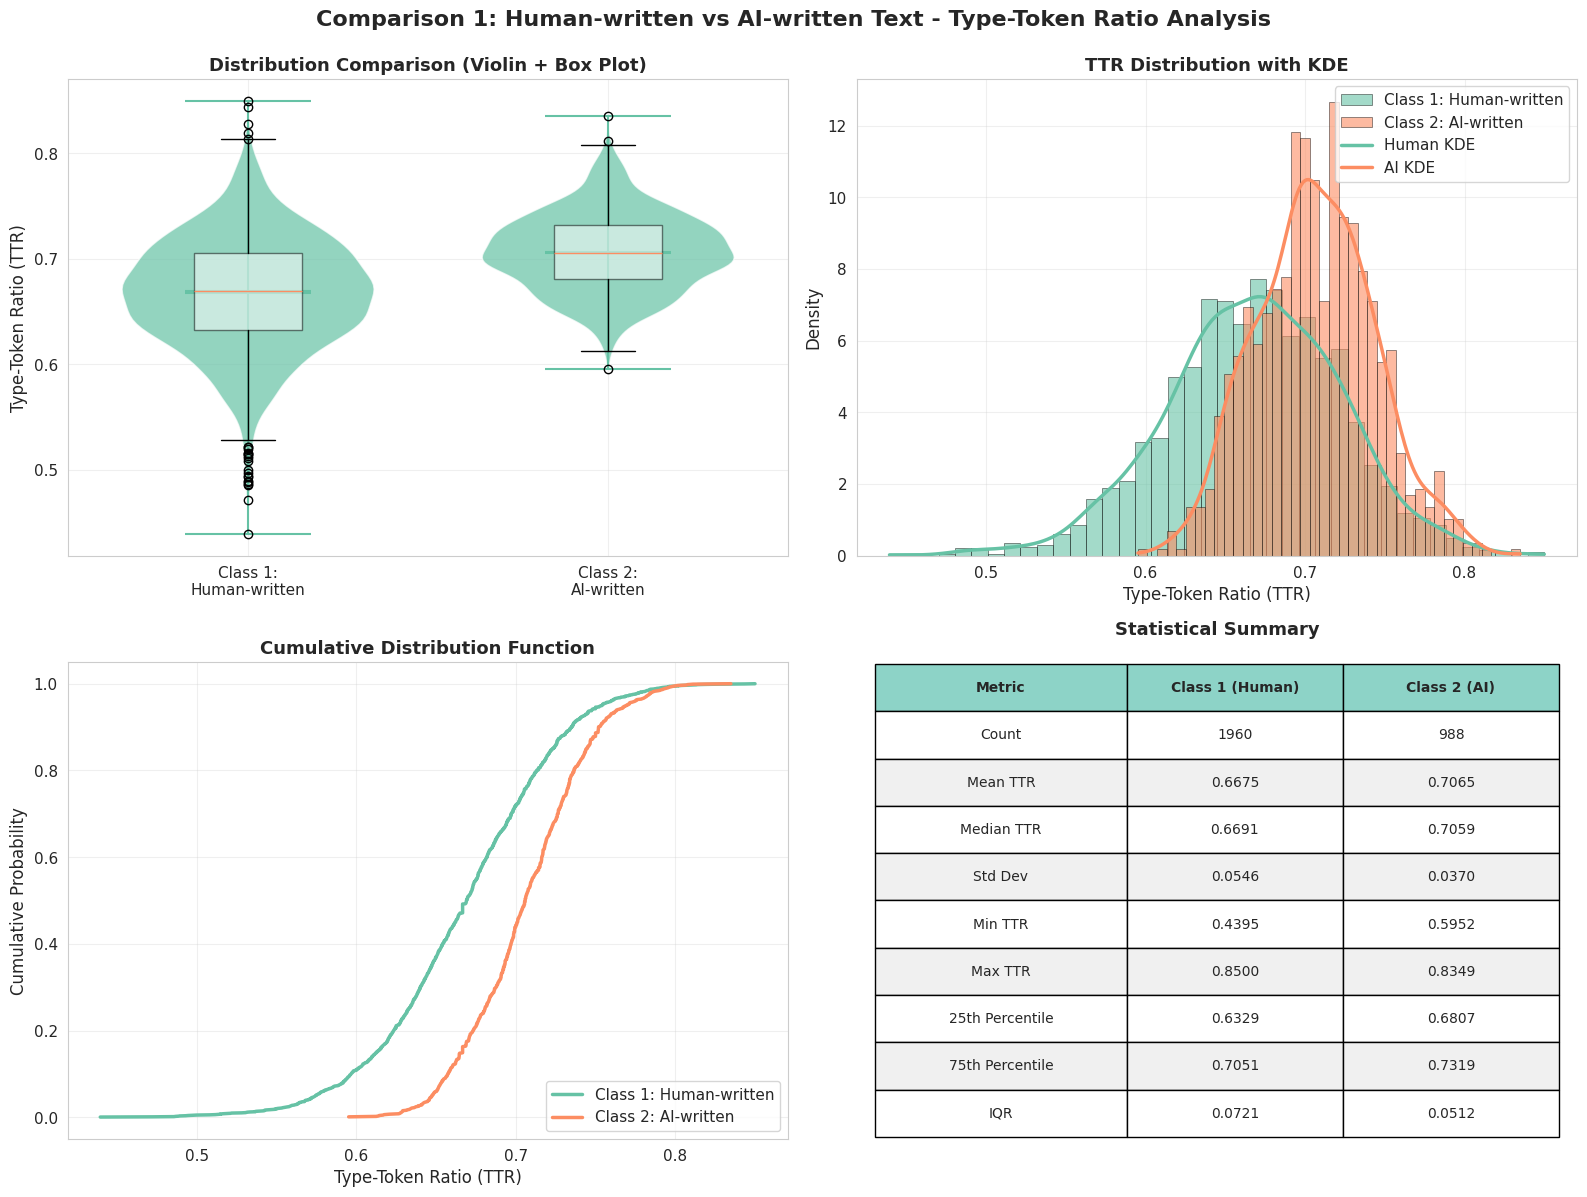

In [17]:
# Combine Class 1 and Class 2 data
df_comparison1 = pd.concat([df_class1, df_class2], ignore_index=True)

# Create a comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comparison 1: Human-written vs AI-written Text - Type-Token Ratio Analysis', 
             fontsize=16, fontweight='bold', y=0.995)

# 1. Violin plot with box plot overlay
ax1 = axes[0, 0]
parts = ax1.violinplot([df_class1['ttr'], df_class2['ttr']], 
                        positions=[0, 1], 
                        showmeans=True, 
                        showmedians=True,
                        widths=0.7)
for pc in parts['bodies']:
    pc.set_alpha(0.7)
ax1.boxplot([df_class1['ttr'], df_class2['ttr']], 
            positions=[0, 1], 
            widths=0.3,
            patch_artist=True,
            boxprops=dict(facecolor='white', alpha=0.5))
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Class 1:\nHuman-written', 'Class 2:\nAI-written'])
ax1.set_ylabel('Type-Token Ratio (TTR)', fontsize=12)
ax1.set_title('Distribution Comparison (Violin + Box Plot)', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)

# 2. Histogram with KDE overlay
ax2 = axes[0, 1]
ax2.hist(df_class1['ttr'], bins=40, alpha=0.6, label='Class 1: Human-written', 
         color='#66c2a5', edgecolor='black', linewidth=0.5, density=True)
ax2.hist(df_class2['ttr'], bins=40, alpha=0.6, label='Class 2: AI-written', 
         color='#fc8d62', edgecolor='black', linewidth=0.5, density=True)

# Add KDE curves
from scipy import stats
if len(df_class1['ttr']) > 0:
    kde1 = stats.gaussian_kde(df_class1['ttr'])
    x_range = np.linspace(df_class1['ttr'].min(), df_class1['ttr'].max(), 200)
    ax2.plot(x_range, kde1(x_range), color='#66c2a5', linewidth=2.5, label='Human KDE')
if len(df_class2['ttr']) > 0:
    kde2 = stats.gaussian_kde(df_class2['ttr'])
    x_range = np.linspace(df_class2['ttr'].min(), df_class2['ttr'].max(), 200)
    ax2.plot(x_range, kde2(x_range), color='#fc8d62', linewidth=2.5, label='AI KDE')

ax2.set_xlabel('Type-Token Ratio (TTR)', fontsize=12)
ax2.set_ylabel('Density', fontsize=12)
ax2.set_title('TTR Distribution with KDE', fontsize=13, fontweight='bold')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

# 3. Cumulative Distribution Function (CDF)
ax3 = axes[1, 0]
sorted_ttr1 = np.sort(df_class1['ttr'])
sorted_ttr2 = np.sort(df_class2['ttr'])
cdf1 = np.arange(1, len(sorted_ttr1) + 1) / len(sorted_ttr1)
cdf2 = np.arange(1, len(sorted_ttr2) + 1) / len(sorted_ttr2)

ax3.plot(sorted_ttr1, cdf1, linewidth=2.5, label='Class 1: Human-written', color='#66c2a5')
ax3.plot(sorted_ttr2, cdf2, linewidth=2.5, label='Class 2: AI-written', color='#fc8d62')
ax3.set_xlabel('Type-Token Ratio (TTR)', fontsize=12)
ax3.set_ylabel('Cumulative Probability', fontsize=12)
ax3.set_title('Cumulative Distribution Function', fontsize=13, fontweight='bold')
ax3.legend(loc='lower right')
ax3.grid(True, alpha=0.3)

# 4. Statistical summary table
ax4 = axes[1, 1]
ax4.axis('off')

# Calculate statistics
stats_data = {
    'Metric': ['Count', 'Mean TTR', 'Median TTR', 'Std Dev', 'Min TTR', 'Max TTR', 
               '25th Percentile', '75th Percentile', 'IQR'],
    'Class 1 (Human)': [
        len(df_class1),
        f"{df_class1['ttr'].mean():.4f}",
        f"{df_class1['ttr'].median():.4f}",
        f"{df_class1['ttr'].std():.4f}",
        f"{df_class1['ttr'].min():.4f}",
        f"{df_class1['ttr'].max():.4f}",
        f"{df_class1['ttr'].quantile(0.25):.4f}",
        f"{df_class1['ttr'].quantile(0.75):.4f}",
        f"{(df_class1['ttr'].quantile(0.75) - df_class1['ttr'].quantile(0.25)):.4f}"
    ],
    'Class 2 (AI)': [
        len(df_class2),
        f"{df_class2['ttr'].mean():.4f}",
        f"{df_class2['ttr'].median():.4f}",
        f"{df_class2['ttr'].std():.4f}",
        f"{df_class2['ttr'].min():.4f}",
        f"{df_class2['ttr'].max():.4f}",
        f"{df_class2['ttr'].quantile(0.25):.4f}",
        f"{df_class2['ttr'].quantile(0.75):.4f}",
        f"{(df_class2['ttr'].quantile(0.75) - df_class2['ttr'].quantile(0.25)):.4f}"
    ]
}

stats_df = pd.DataFrame(stats_data)
table = ax4.table(cellText=stats_df.values, colLabels=stats_df.columns,
                  cellLoc='center', loc='center',
                  colWidths=[0.35, 0.3, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2.5)

# Style the header
for i in range(len(stats_df.columns)):
    table[(0, i)].set_facecolor('#8dd3c7')
    table[(0, i)].set_text_props(weight='bold')

# Alternate row colors
for i in range(1, len(stats_df) + 1):
    for j in range(len(stats_df.columns)):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#f0f0f0')

ax4.set_title('Statistical Summary', fontsize=13, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

### Comparison 2: Class 1 (Human-written) vs Class 3 (AI-mimicry)

Now let's compare human-written text with AI attempting to mimic human authors.

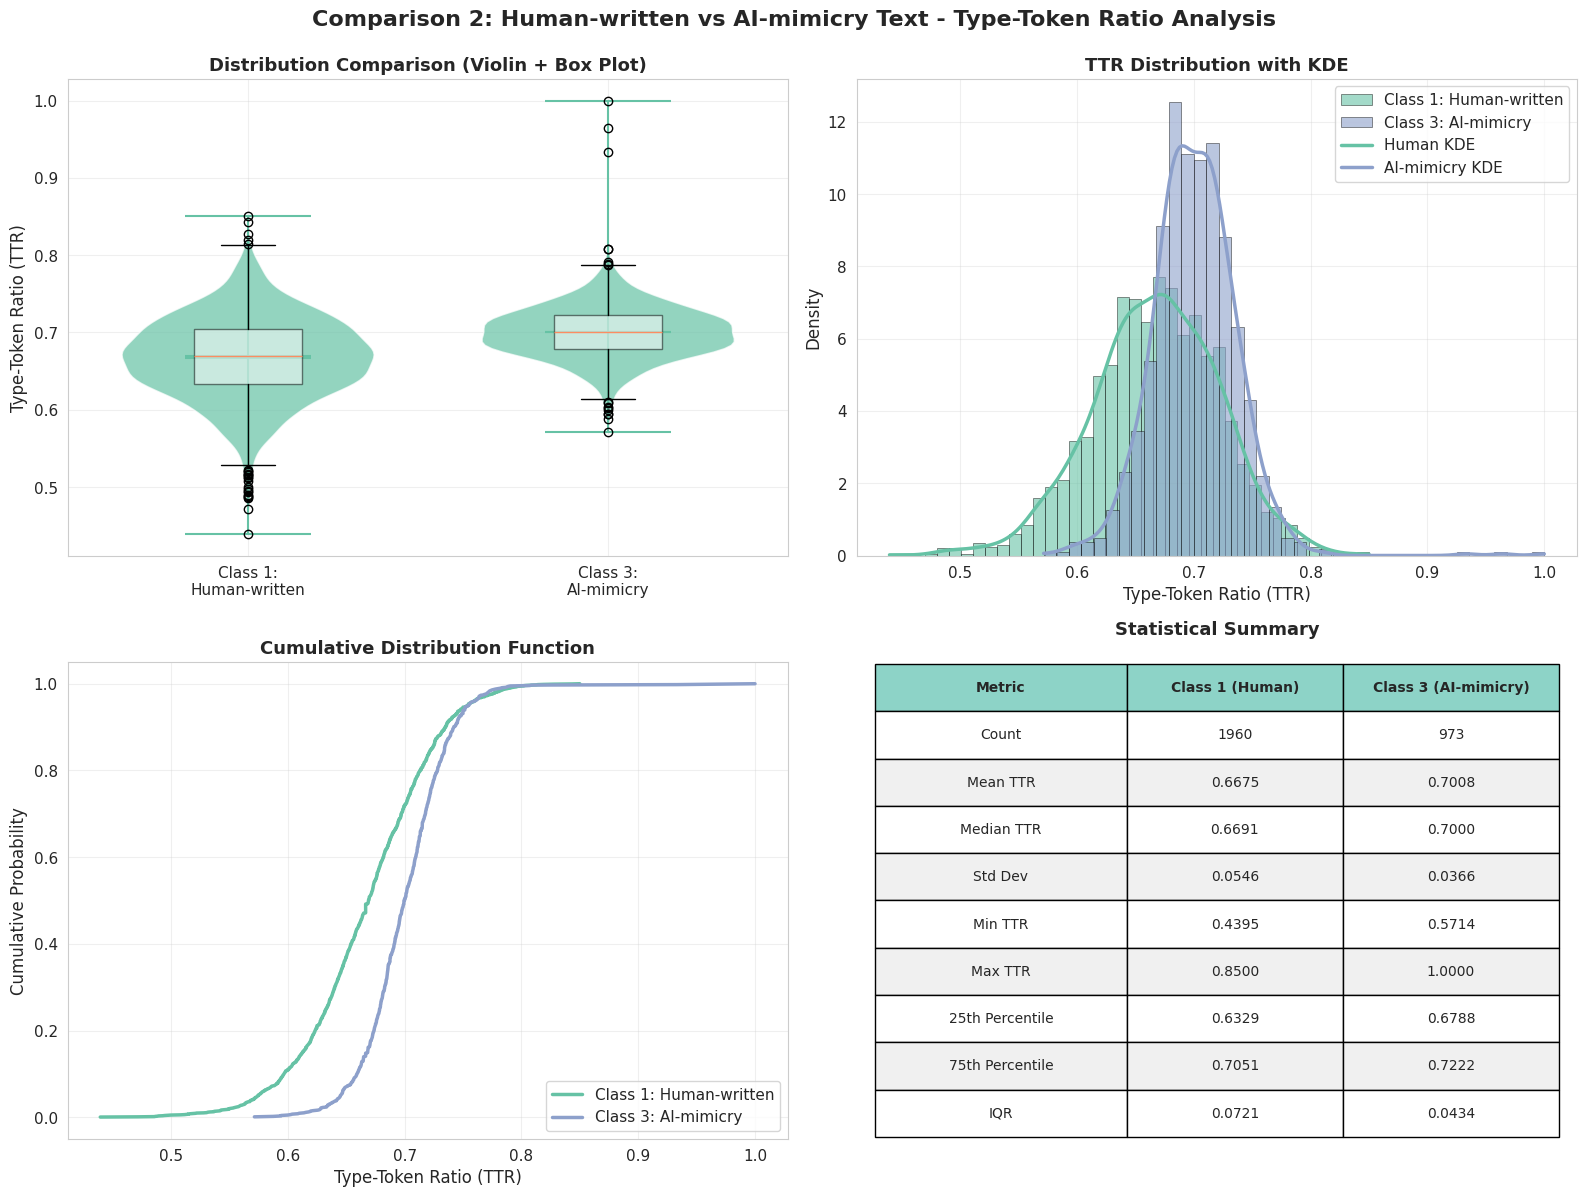

In [18]:
# Combine Class 1 and Class 3 data
df_comparison2 = pd.concat([df_class1, df_class3], ignore_index=True)

# Create a comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comparison 2: Human-written vs AI-mimicry Text - Type-Token Ratio Analysis', 
             fontsize=16, fontweight='bold', y=0.995)

# 1. Violin plot with box plot overlay
ax1 = axes[0, 0]
parts = ax1.violinplot([df_class1['ttr'], df_class3['ttr']], 
                        positions=[0, 1], 
                        showmeans=True, 
                        showmedians=True,
                        widths=0.7)
for pc in parts['bodies']:
    pc.set_alpha(0.7)
ax1.boxplot([df_class1['ttr'], df_class3['ttr']], 
            positions=[0, 1], 
            widths=0.3,
            patch_artist=True,
            boxprops=dict(facecolor='white', alpha=0.5))
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Class 1:\nHuman-written', 'Class 3:\nAI-mimicry'])
ax1.set_ylabel('Type-Token Ratio (TTR)', fontsize=12)
ax1.set_title('Distribution Comparison (Violin + Box Plot)', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)

# 2. Histogram with KDE overlay
ax2 = axes[0, 1]
ax2.hist(df_class1['ttr'], bins=40, alpha=0.6, label='Class 1: Human-written', 
         color='#66c2a5', edgecolor='black', linewidth=0.5, density=True)
ax2.hist(df_class3['ttr'], bins=40, alpha=0.6, label='Class 3: AI-mimicry', 
         color='#8da0cb', edgecolor='black', linewidth=0.5, density=True)

# Add KDE curves
from scipy import stats
if len(df_class1['ttr']) > 0:
    kde1 = stats.gaussian_kde(df_class1['ttr'])
    x_range = np.linspace(df_class1['ttr'].min(), df_class1['ttr'].max(), 200)
    ax2.plot(x_range, kde1(x_range), color='#66c2a5', linewidth=2.5, label='Human KDE')
if len(df_class3['ttr']) > 0:
    kde3 = stats.gaussian_kde(df_class3['ttr'])
    x_range = np.linspace(df_class3['ttr'].min(), df_class3['ttr'].max(), 200)
    ax2.plot(x_range, kde3(x_range), color='#8da0cb', linewidth=2.5, label='AI-mimicry KDE')

ax2.set_xlabel('Type-Token Ratio (TTR)', fontsize=12)
ax2.set_ylabel('Density', fontsize=12)
ax2.set_title('TTR Distribution with KDE', fontsize=13, fontweight='bold')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

# 3. Cumulative Distribution Function (CDF)
ax3 = axes[1, 0]
sorted_ttr1 = np.sort(df_class1['ttr'])
sorted_ttr3 = np.sort(df_class3['ttr'])
cdf1 = np.arange(1, len(sorted_ttr1) + 1) / len(sorted_ttr1)
cdf3 = np.arange(1, len(sorted_ttr3) + 1) / len(sorted_ttr3)

ax3.plot(sorted_ttr1, cdf1, linewidth=2.5, label='Class 1: Human-written', color='#66c2a5')
ax3.plot(sorted_ttr3, cdf3, linewidth=2.5, label='Class 3: AI-mimicry', color='#8da0cb')
ax3.set_xlabel('Type-Token Ratio (TTR)', fontsize=12)
ax3.set_ylabel('Cumulative Probability', fontsize=12)
ax3.set_title('Cumulative Distribution Function', fontsize=13, fontweight='bold')
ax3.legend(loc='lower right')
ax3.grid(True, alpha=0.3)

# 4. Statistical summary table
ax4 = axes[1, 1]
ax4.axis('off')

# Calculate statistics
stats_data = {
    'Metric': ['Count', 'Mean TTR', 'Median TTR', 'Std Dev', 'Min TTR', 'Max TTR', 
               '25th Percentile', '75th Percentile', 'IQR'],
    'Class 1 (Human)': [
        len(df_class1),
        f"{df_class1['ttr'].mean():.4f}",
        f"{df_class1['ttr'].median():.4f}",
        f"{df_class1['ttr'].std():.4f}",
        f"{df_class1['ttr'].min():.4f}",
        f"{df_class1['ttr'].max():.4f}",
        f"{df_class1['ttr'].quantile(0.25):.4f}",
        f"{df_class1['ttr'].quantile(0.75):.4f}",
        f"{(df_class1['ttr'].quantile(0.75) - df_class1['ttr'].quantile(0.25)):.4f}"
    ],
    'Class 3 (AI-mimicry)': [
        len(df_class3),
        f"{df_class3['ttr'].mean():.4f}",
        f"{df_class3['ttr'].median():.4f}",
        f"{df_class3['ttr'].std():.4f}",
        f"{df_class3['ttr'].min():.4f}",
        f"{df_class3['ttr'].max():.4f}",
        f"{df_class3['ttr'].quantile(0.25):.4f}",
        f"{df_class3['ttr'].quantile(0.75):.4f}",
        f"{(df_class3['ttr'].quantile(0.75) - df_class3['ttr'].quantile(0.25)):.4f}"
    ]
}

stats_df = pd.DataFrame(stats_data)
table = ax4.table(cellText=stats_df.values, colLabels=stats_df.columns,
                  cellLoc='center', loc='center',
                  colWidths=[0.35, 0.3, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2.5)

# Style the header
for i in range(len(stats_df.columns)):
    table[(0, i)].set_facecolor('#8dd3c7')
    table[(0, i)].set_text_props(weight='bold')

# Alternate row colors
for i in range(1, len(stats_df) + 1):
    for j in range(len(stats_df.columns)):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#f0f0f0')

ax4.set_title('Statistical Summary', fontsize=13, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

### Comparison 3: Class 2 (AI-written) vs Class 3 (AI-mimicry)

Here we compare two types of AI-generated text: generic AI-written vs AI attempting to mimic specific authors.

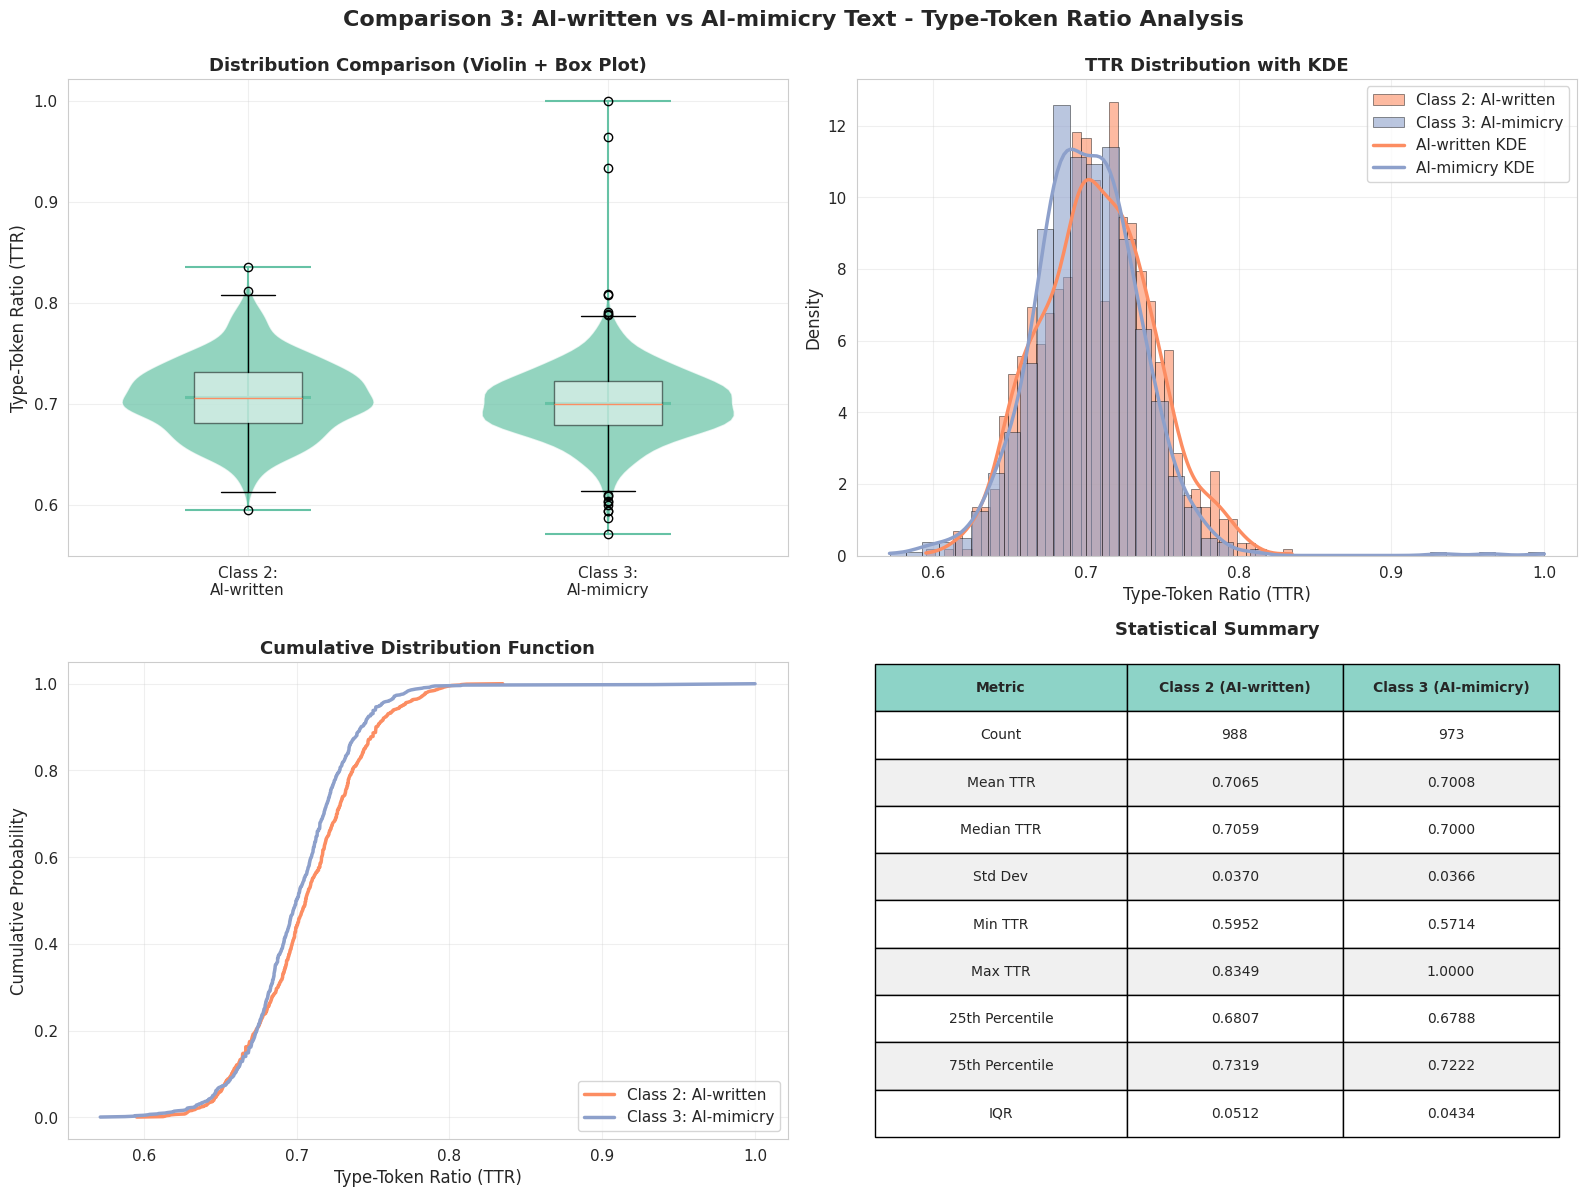

In [19]:
# Combine Class 2 and Class 3 data
df_comparison3 = pd.concat([df_class2, df_class3], ignore_index=True)

# Create a comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comparison 3: AI-written vs AI-mimicry Text - Type-Token Ratio Analysis', 
             fontsize=16, fontweight='bold', y=0.995)

# 1. Violin plot with box plot overlay
ax1 = axes[0, 0]
parts = ax1.violinplot([df_class2['ttr'], df_class3['ttr']], 
                        positions=[0, 1], 
                        showmeans=True, 
                        showmedians=True,
                        widths=0.7)
for pc in parts['bodies']:
    pc.set_alpha(0.7)
ax1.boxplot([df_class2['ttr'], df_class3['ttr']], 
            positions=[0, 1], 
            widths=0.3,
            patch_artist=True,
            boxprops=dict(facecolor='white', alpha=0.5))
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Class 2:\nAI-written', 'Class 3:\nAI-mimicry'])
ax1.set_ylabel('Type-Token Ratio (TTR)', fontsize=12)
ax1.set_title('Distribution Comparison (Violin + Box Plot)', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)

# 2. Histogram with KDE overlay
ax2 = axes[0, 1]
ax2.hist(df_class2['ttr'], bins=40, alpha=0.6, label='Class 2: AI-written', 
         color='#fc8d62', edgecolor='black', linewidth=0.5, density=True)
ax2.hist(df_class3['ttr'], bins=40, alpha=0.6, label='Class 3: AI-mimicry', 
         color='#8da0cb', edgecolor='black', linewidth=0.5, density=True)

# Add KDE curves
from scipy import stats
if len(df_class2['ttr']) > 0:
    kde2 = stats.gaussian_kde(df_class2['ttr'])
    x_range = np.linspace(df_class2['ttr'].min(), df_class2['ttr'].max(), 200)
    ax2.plot(x_range, kde2(x_range), color='#fc8d62', linewidth=2.5, label='AI-written KDE')
if len(df_class3['ttr']) > 0:
    kde3 = stats.gaussian_kde(df_class3['ttr'])
    x_range = np.linspace(df_class3['ttr'].min(), df_class3['ttr'].max(), 200)
    ax2.plot(x_range, kde3(x_range), color='#8da0cb', linewidth=2.5, label='AI-mimicry KDE')

ax2.set_xlabel('Type-Token Ratio (TTR)', fontsize=12)
ax2.set_ylabel('Density', fontsize=12)
ax2.set_title('TTR Distribution with KDE', fontsize=13, fontweight='bold')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

# 3. Cumulative Distribution Function (CDF)
ax3 = axes[1, 0]
sorted_ttr2 = np.sort(df_class2['ttr'])
sorted_ttr3 = np.sort(df_class3['ttr'])
cdf2 = np.arange(1, len(sorted_ttr2) + 1) / len(sorted_ttr2)
cdf3 = np.arange(1, len(sorted_ttr3) + 1) / len(sorted_ttr3)

ax3.plot(sorted_ttr2, cdf2, linewidth=2.5, label='Class 2: AI-written', color='#fc8d62')
ax3.plot(sorted_ttr3, cdf3, linewidth=2.5, label='Class 3: AI-mimicry', color='#8da0cb')
ax3.set_xlabel('Type-Token Ratio (TTR)', fontsize=12)
ax3.set_ylabel('Cumulative Probability', fontsize=12)
ax3.set_title('Cumulative Distribution Function', fontsize=13, fontweight='bold')
ax3.legend(loc='lower right')
ax3.grid(True, alpha=0.3)

# 4. Statistical summary table
ax4 = axes[1, 1]
ax4.axis('off')

# Calculate statistics
stats_data = {
    'Metric': ['Count', 'Mean TTR', 'Median TTR', 'Std Dev', 'Min TTR', 'Max TTR', 
               '25th Percentile', '75th Percentile', 'IQR'],
    'Class 2 (AI-written)': [
        len(df_class2),
        f"{df_class2['ttr'].mean():.4f}",
        f"{df_class2['ttr'].median():.4f}",
        f"{df_class2['ttr'].std():.4f}",
        f"{df_class2['ttr'].min():.4f}",
        f"{df_class2['ttr'].max():.4f}",
        f"{df_class2['ttr'].quantile(0.25):.4f}",
        f"{df_class2['ttr'].quantile(0.75):.4f}",
        f"{(df_class2['ttr'].quantile(0.75) - df_class2['ttr'].quantile(0.25)):.4f}"
    ],
    'Class 3 (AI-mimicry)': [
        len(df_class3),
        f"{df_class3['ttr'].mean():.4f}",
        f"{df_class3['ttr'].median():.4f}",
        f"{df_class3['ttr'].std():.4f}",
        f"{df_class3['ttr'].min():.4f}",
        f"{df_class3['ttr'].max():.4f}",
        f"{df_class3['ttr'].quantile(0.25):.4f}",
        f"{df_class3['ttr'].quantile(0.75):.4f}",
        f"{(df_class3['ttr'].quantile(0.75) - df_class3['ttr'].quantile(0.25)):.4f}"
    ]
}

stats_df = pd.DataFrame(stats_data)
table = ax4.table(cellText=stats_df.values, colLabels=stats_df.columns,
                  cellLoc='center', loc='center',
                  colWidths=[0.35, 0.3, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2.5)

# Style the header
for i in range(len(stats_df.columns)):
    table[(0, i)].set_facecolor('#8dd3c7')
    table[(0, i)].set_text_props(weight='bold')

# Alternate row colors
for i in range(1, len(stats_df) + 1):
    for j in range(len(stats_df.columns)):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#f0f0f0')

ax4.set_title('Statistical Summary', fontsize=13, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

### Comparison 4: All Three Classes Together

Finally, let's visualize all three classes together to get a comprehensive view of TTR across all text types.

/tmp/ipykernel_4764/2192227012.py:153: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax6.boxplot([df_class1['ttr'], df_class2['ttr'], df_class3['ttr']],
/tmp/ipykernel_4764/2192227012.py:177: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_sample, x='class', y='ttr', ax=ax7,
/tmp/ipykernel_4764/2192227012.py:183: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax7.set_xticklabels(['Human', 'AI-written', 'AI-mimicry'], rotation=15)
/tmp/ipykernel_4764/2192227012.py:208: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


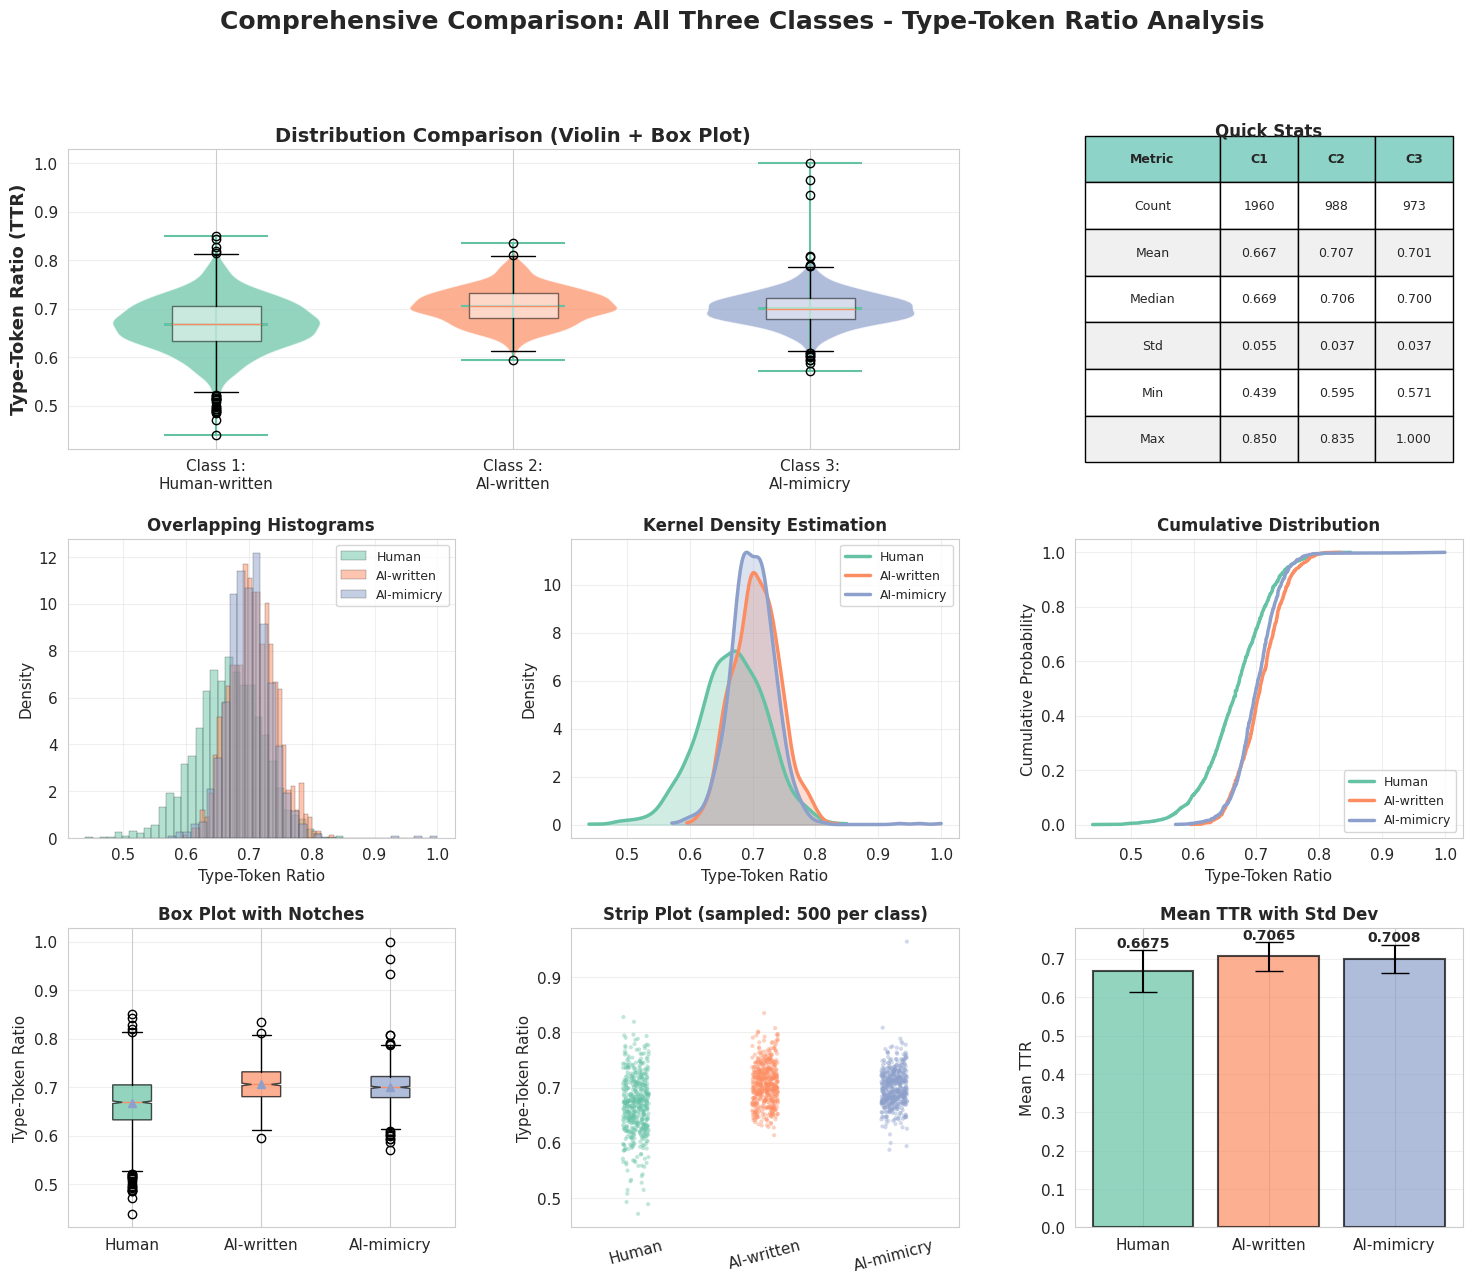


Kruskal-Wallis H-test (All Three Classes)
H-statistic: 514.45
P-value: 1.95e-112
Result: At least one class is SIGNIFICANTLY different (p < 0.05)


In [20]:
# Combine all classes
df_all = pd.concat([df_class1, df_class2, df_class3], ignore_index=True)

# Create a comprehensive visualization with all three classes
fig = plt.figure(figsize=(18, 14))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

fig.suptitle('Comprehensive Comparison: All Three Classes - Type-Token Ratio Analysis', 
             fontsize=18, fontweight='bold', y=0.98)

# 1. Large violin plot with all three classes (top left, spanning 2 columns)
ax1 = fig.add_subplot(gs[0, :2])
parts = ax1.violinplot([df_class1['ttr'], df_class2['ttr'], df_class3['ttr']], 
                        positions=[0, 1, 2], 
                        showmeans=True, 
                        showmedians=True,
                        widths=0.7)

# Color the violin plots
colors = ['#66c2a5', '#fc8d62', '#8da0cb']
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_alpha(0.7)

# Overlay box plots
bp = ax1.boxplot([df_class1['ttr'], df_class2['ttr'], df_class3['ttr']], 
                  positions=[0, 1, 2], 
                  widths=0.3,
                  patch_artist=True)

for i, patch in enumerate(bp['boxes']):
    patch.set_facecolor('white')
    patch.set_alpha(0.5)

ax1.set_xticks([0, 1, 2])
ax1.set_xticklabels(['Class 1:\nHuman-written', 'Class 2:\nAI-written', 'Class 3:\nAI-mimicry'])
ax1.set_ylabel('Type-Token Ratio (TTR)', fontsize=13, fontweight='bold')
ax1.set_title('Distribution Comparison (Violin + Box Plot)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# 2. Statistical summary table (top right)
ax2 = fig.add_subplot(gs[0, 2])
ax2.axis('off')

stats_data = {
    'Metric': ['Count', 'Mean', 'Median', 'Std', 'Min', 'Max'],
    'C1': [
        len(df_class1),
        f"{df_class1['ttr'].mean():.3f}",
        f"{df_class1['ttr'].median():.3f}",
        f"{df_class1['ttr'].std():.3f}",
        f"{df_class1['ttr'].min():.3f}",
        f"{df_class1['ttr'].max():.3f}"
    ],
    'C2': [
        len(df_class2),
        f"{df_class2['ttr'].mean():.3f}",
        f"{df_class2['ttr'].median():.3f}",
        f"{df_class2['ttr'].std():.3f}",
        f"{df_class2['ttr'].min():.3f}",
        f"{df_class2['ttr'].max():.3f}"
    ],
    'C3': [
        len(df_class3),
        f"{df_class3['ttr'].mean():.3f}",
        f"{df_class3['ttr'].median():.3f}",
        f"{df_class3['ttr'].std():.3f}",
        f"{df_class3['ttr'].min():.3f}",
        f"{df_class3['ttr'].max():.3f}"
    ]
}

stats_df = pd.DataFrame(stats_data)
table = ax2.table(cellText=stats_df.values, colLabels=stats_df.columns,
                  cellLoc='center', loc='center',
                  colWidths=[0.35, 0.2, 0.2, 0.2])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2.8)

for i in range(len(stats_df.columns)):
    table[(0, i)].set_facecolor('#8dd3c7')
    table[(0, i)].set_text_props(weight='bold')

for i in range(1, len(stats_df) + 1):
    for j in range(len(stats_df.columns)):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#f0f0f0')

ax2.set_title('Quick Stats', fontsize=12, fontweight='bold', pad=10)

# 3. Overlapping histograms with KDE (middle left)
ax3 = fig.add_subplot(gs[1, 0])
ax3.hist(df_class1['ttr'], bins=35, alpha=0.5, label='Human', 
         color='#66c2a5', edgecolor='black', linewidth=0.3, density=True)
ax3.hist(df_class2['ttr'], bins=35, alpha=0.5, label='AI-written', 
         color='#fc8d62', edgecolor='black', linewidth=0.3, density=True)
ax3.hist(df_class3['ttr'], bins=35, alpha=0.5, label='AI-mimicry', 
         color='#8da0cb', edgecolor='black', linewidth=0.3, density=True)
ax3.set_xlabel('Type-Token Ratio', fontsize=11)
ax3.set_ylabel('Density', fontsize=11)
ax3.set_title('Overlapping Histograms', fontsize=12, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)

# 4. KDE comparison (middle center)
ax4 = fig.add_subplot(gs[1, 1])
from scipy import stats
if len(df_class1['ttr']) > 0:
    kde1 = stats.gaussian_kde(df_class1['ttr'])
    x_range = np.linspace(df_class1['ttr'].min(), df_class1['ttr'].max(), 300)
    ax4.plot(x_range, kde1(x_range), color='#66c2a5', linewidth=2.5, label='Human')
    ax4.fill_between(x_range, kde1(x_range), alpha=0.3, color='#66c2a5')

if len(df_class2['ttr']) > 0:
    kde2 = stats.gaussian_kde(df_class2['ttr'])
    x_range = np.linspace(df_class2['ttr'].min(), df_class2['ttr'].max(), 300)
    ax4.plot(x_range, kde2(x_range), color='#fc8d62', linewidth=2.5, label='AI-written')
    ax4.fill_between(x_range, kde2(x_range), alpha=0.3, color='#fc8d62')

if len(df_class3['ttr']) > 0:
    kde3 = stats.gaussian_kde(df_class3['ttr'])
    x_range = np.linspace(df_class3['ttr'].min(), df_class3['ttr'].max(), 300)
    ax4.plot(x_range, kde3(x_range), color='#8da0cb', linewidth=2.5, label='AI-mimicry')
    ax4.fill_between(x_range, kde3(x_range), alpha=0.3, color='#8da0cb')

ax4.set_xlabel('Type-Token Ratio', fontsize=11)
ax4.set_ylabel('Density', fontsize=11)
ax4.set_title('Kernel Density Estimation', fontsize=12, fontweight='bold')
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3)

# 5. Cumulative Distribution Function (middle right)
ax5 = fig.add_subplot(gs[1, 2])
sorted_ttr1 = np.sort(df_class1['ttr'])
sorted_ttr2 = np.sort(df_class2['ttr'])
sorted_ttr3 = np.sort(df_class3['ttr'])
cdf1 = np.arange(1, len(sorted_ttr1) + 1) / len(sorted_ttr1)
cdf2 = np.arange(1, len(sorted_ttr2) + 1) / len(sorted_ttr2)
cdf3 = np.arange(1, len(sorted_ttr3) + 1) / len(sorted_ttr3)

ax5.plot(sorted_ttr1, cdf1, linewidth=2.5, label='Human', color='#66c2a5')
ax5.plot(sorted_ttr2, cdf2, linewidth=2.5, label='AI-written', color='#fc8d62')
ax5.plot(sorted_ttr3, cdf3, linewidth=2.5, label='AI-mimicry', color='#8da0cb')
ax5.set_xlabel('Type-Token Ratio', fontsize=11)
ax5.set_ylabel('Cumulative Probability', fontsize=11)
ax5.set_title('Cumulative Distribution', fontsize=12, fontweight='bold')
ax5.legend(fontsize=9, loc='lower right')
ax5.grid(True, alpha=0.3)

# 6. Box plot comparison (bottom left)
ax6 = fig.add_subplot(gs[2, 0])
bp = ax6.boxplot([df_class1['ttr'], df_class2['ttr'], df_class3['ttr']], 
                  labels=['Human', 'AI-written', 'AI-mimicry'],
                  patch_artist=True,
                  notch=True,
                  showmeans=True)

for i, patch in enumerate(bp['boxes']):
    patch.set_facecolor(colors[i])
    patch.set_alpha(0.7)

ax6.set_ylabel('Type-Token Ratio', fontsize=11)
ax6.set_title('Box Plot with Notches', fontsize=12, fontweight='bold')
ax6.grid(True, alpha=0.3, axis='y')

# 7. Swarm plot (bottom center)
ax7 = fig.add_subplot(gs[2, 1])
# Sample data for better visualization if too many points
sample_size = min(500, len(df_class1), len(df_class2), len(df_class3))
df_sample = pd.concat([
    df_class1.sample(n=min(sample_size, len(df_class1)), random_state=42),
    df_class2.sample(n=min(sample_size, len(df_class2)), random_state=42),
    df_class3.sample(n=min(sample_size, len(df_class3)), random_state=42)
])

sns.stripplot(data=df_sample, x='class', y='ttr', ax=ax7, 
              palette=['#66c2a5', '#fc8d62', '#8da0cb'],
              alpha=0.4, size=3)
ax7.set_xlabel('')
ax7.set_ylabel('Type-Token Ratio', fontsize=11)
ax7.set_title(f'Strip Plot (sampled: {sample_size} per class)', fontsize=12, fontweight='bold')
ax7.set_xticklabels(['Human', 'AI-written', 'AI-mimicry'], rotation=15)
ax7.grid(True, alpha=0.3, axis='y')

# 8. Mean comparison bar plot with error bars (bottom right)
ax8 = fig.add_subplot(gs[2, 2])
means = [df_class1['ttr'].mean(), df_class2['ttr'].mean(), df_class3['ttr'].mean()]
stds = [df_class1['ttr'].std(), df_class2['ttr'].std(), df_class3['ttr'].std()]
x_pos = [0, 1, 2]

bars = ax8.bar(x_pos, means, yerr=stds, capsize=10, 
               color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for i, (bar, mean, std) in enumerate(zip(bars, means, stds)):
    height = bar.get_height()
    ax8.text(bar.get_x() + bar.get_width()/2., height + std,
             f'{mean:.4f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

ax8.set_xticks(x_pos)
ax8.set_xticklabels(['Human', 'AI-written', 'AI-mimicry'])
ax8.set_ylabel('Mean TTR', fontsize=11)
ax8.set_title('Mean TTR with Std Dev', fontsize=12, fontweight='bold')
ax8.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Statistical testing: Kruskal-Wallis H-test (non-parametric ANOVA)
from scipy.stats import kruskal
h_statistic, p_value = kruskal(df_class1['ttr'], df_class2['ttr'], df_class3['ttr'])

print(f"\n{'='*70}")
print(f"Kruskal-Wallis H-test (All Three Classes)")
print(f"{'='*70}")
print(f"H-statistic: {h_statistic:.2f}")
print(f"P-value: {p_value:.2e}")
if p_value < 0.05:
    print(f"Result: At least one class is SIGNIFICANTLY different (p < 0.05)")
else:
    print(f"Result: NO significant differences among classes (p >= 0.05)")
print(f"{'='*70}")


### The results for TTR

This was quite surprising. As per the initial literature I had read, I was almost sure that the AI generate text would have a lower TTR than the human generated text. But it is not the case. It is clustered higher. 

I had to search up quite a bit on why this could be. Having already once fully reconfigured my dataset, I am yet to fully rule that out as the issue, but I find it a *bit* unlikely...

TTR naturally decreases with longer texts because words get repeated more often in longer documents. 

**So I checked if word count is correlated with TTR and if this bias affects our results.** You can see that here below.

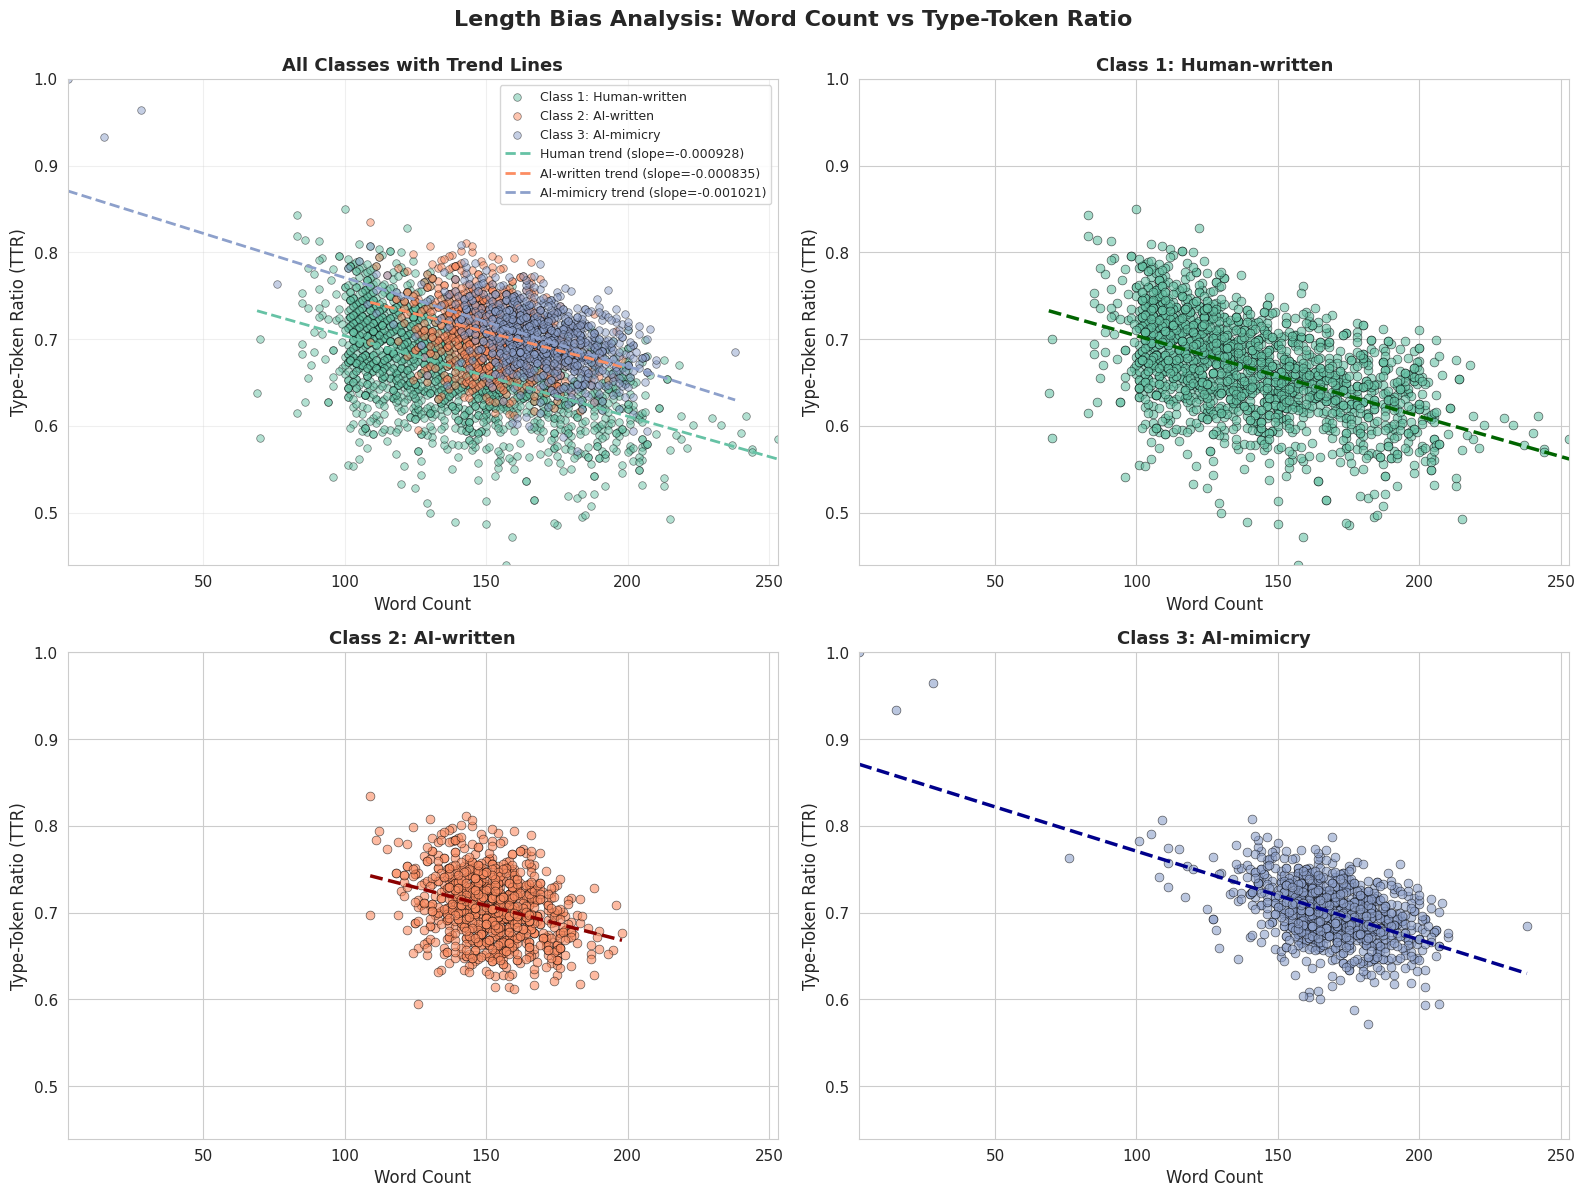

LINEAR REGRESSION ANALYSIS: Word Count vs TTR

Class 1 (Human-written):
  Slope: -0.000928 (TTR change per word)

Class 2 (AI-written):
  Slope: -0.000835 (TTR change per word)

Class 3 (AI-mimicry):
  Slope: -0.001021 (TTR change per word)
WORD COUNT STATISTICS

Class 1 (Human-written):
  Mean word count: 139.3
  Median word count: 133.0
  Std dev: 30.4
  Range: 69 - 253

Class 2 (AI-written):
  Mean word count: 152.1
  Median word count: 152.0
  Std dev: 13.9
  Range: 109 - 198

Class 3 (AI-mimicry):
  Mean word count: 168.6
  Median word count: 169.0
  Std dev: 19.3
  Range: 2 - 238
  Range: 2 - 238
  Range: 2 - 238
  Range: 2 - 238


In [21]:
# Scatter plot: Word Count vs TTR to check for length bias
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Length Bias Analysis: Word Count vs Type-Token Ratio', 
             fontsize=16, fontweight='bold', y=0.995)

# Determine common axis limits for all plots
all_word_counts = pd.concat([df_class1['word_count'], df_class2['word_count'], df_class3['word_count']])
all_ttrs = pd.concat([df_class1['ttr'], df_class2['ttr'], df_class3['ttr']])
word_count_range = [all_word_counts.min(), all_word_counts.max()]
ttr_range = [all_ttrs.min(), all_ttrs.max()]

# 1. All three classes overlaid
ax1 = axes[0, 0]
ax1.scatter(df_class1['word_count'], df_class1['ttr'], alpha=0.5, s=30, 
           color='#66c2a5', label='Class 1: Human-written', edgecolors='black', linewidths=0.5)
ax1.scatter(df_class2['word_count'], df_class2['ttr'], alpha=0.5, s=30, 
           color='#fc8d62', label='Class 2: AI-written', edgecolors='black', linewidths=0.5)
ax1.scatter(df_class3['word_count'], df_class3['ttr'], alpha=0.5, s=30, 
           color='#8da0cb', label='Class 3: AI-mimicry', edgecolors='black', linewidths=0.5)

# Add trend lines
from scipy.stats import linregress
if len(df_class1) > 0:
    slope1, intercept1, r1, p1, se1 = linregress(df_class1['word_count'], df_class1['ttr'])
    x_fit1 = np.linspace(df_class1['word_count'].min(), df_class1['word_count'].max(), 100)
    ax1.plot(x_fit1, slope1 * x_fit1 + intercept1, color='#66c2a5', linewidth=2, 
             linestyle='--', label=f'Human trend (slope={slope1:.6f})')

if len(df_class2) > 0:
    slope2, intercept2, r2, p2, se2 = linregress(df_class2['word_count'], df_class2['ttr'])
    x_fit2 = np.linspace(df_class2['word_count'].min(), df_class2['word_count'].max(), 100)
    ax1.plot(x_fit2, slope2 * x_fit2 + intercept2, color='#fc8d62', linewidth=2, 
             linestyle='--', label=f'AI-written trend (slope={slope2:.6f})')

if len(df_class3) > 0:
    slope3, intercept3, r3, p3, se3 = linregress(df_class3['word_count'], df_class3['ttr'])
    x_fit3 = np.linspace(df_class3['word_count'].min(), df_class3['word_count'].max(), 100)
    ax1.plot(x_fit3, slope3 * x_fit3 + intercept3, color='#8da0cb', linewidth=2, 
             linestyle='--', label=f'AI-mimicry trend (slope={slope3:.6f})')

ax1.set_xlabel('Word Count', fontsize=12)
ax1.set_ylabel('Type-Token Ratio (TTR)', fontsize=12)
ax1.set_title('All Classes with Trend Lines', fontsize=13, fontweight='bold')
ax1.legend(loc='best', fontsize=9)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(word_count_range)
ax1.set_ylim(ttr_range)

# 2. Class 1 only (Human-written)
ax2 = axes[0, 1]
ax2.scatter(df_class1['word_count'], df_class1['ttr'], alpha=0.6, s=40, 
           color='#66c2a5', edgecolors='black', linewidths=0.5)
if len(df_class1) > 0:
    ax2.plot(x_fit1, slope1 * x_fit1 + intercept1, color='darkgreen', linewidth=2.5, 
             linestyle='--', label=f'Trend line (slope={slope1:.6f})')
ax2.set_xlabel('Word Count', fontsize=12)
ax2.set_ylabel('Type-Token Ratio (TTR)', fontsize=12)
ax2.set_title('Class 1: Human-written', fontsize=13, fontweight='bold')
ax2.set_xlim(word_count_range)
ax2.set_ylim(ttr_range)

# 3. Class 2 only (AI-written)
ax3 = axes[1, 0]
ax3.scatter(df_class2['word_count'], df_class2['ttr'], alpha=0.6, s=40, 
           color='#fc8d62', edgecolors='black', linewidths=0.5)
if len(df_class2) > 0:
    ax3.plot(x_fit2, slope2 * x_fit2 + intercept2, color='darkred', linewidth=2.5, 
             linestyle='--', label=f'Trend line (slope={slope2:.6f})')
ax3.set_xlabel('Word Count', fontsize=12)
ax3.set_ylabel('Type-Token Ratio (TTR)', fontsize=12)
ax3.set_title('Class 2: AI-written', fontsize=13, fontweight='bold')
ax3.set_xlim(word_count_range)
ax3.set_ylim(ttr_range)

# 4. Class 3 only (AI-mimicry)
ax4 = axes[1, 1]
ax4.scatter(df_class3['word_count'], df_class3['ttr'], alpha=0.6, s=40, 
           color='#8da0cb', edgecolors='black', linewidths=0.5)
if len(df_class3) > 0:
    ax4.plot(x_fit3, slope3 * x_fit3 + intercept3, color='darkblue', linewidth=2.5, 
             linestyle='--', label=f'Trend line (slope={slope3:.6f})')
ax4.set_xlabel('Word Count', fontsize=12)
ax4.set_ylabel('Type-Token Ratio (TTR)', fontsize=12)
ax4.set_title('Class 3: AI-mimicry', fontsize=13, fontweight='bold')
ax4.set_xlim(word_count_range)
ax4.set_ylim(ttr_range)

plt.tight_layout()
plt.show()

# Print slope statistics
print(f"LINEAR REGRESSION ANALYSIS: Word Count vs TTR")
print(f"\nClass 1 (Human-written):")
print(f"  Slope: {slope1:.6f} (TTR change per word)")

print(f"\nClass 2 (AI-written):")
print(f"  Slope: {slope2:.6f} (TTR change per word)")

print(f"\nClass 3 (AI-mimicry):")
print(f"  Slope: {slope3:.6f} (TTR change per word)")

print(f"WORD COUNT STATISTICS")
print(f"\nClass 1 (Human-written):")
print(f"  Mean word count: {df_class1['word_count'].mean():.1f}")
print(f"  Median word count: {df_class1['word_count'].median():.1f}")
print(f"  Std dev: {df_class1['word_count'].std():.1f}")
print(f"  Range: {df_class1['word_count'].min():.0f} - {df_class1['word_count'].max():.0f}")

print(f"\nClass 2 (AI-written):")
print(f"  Mean word count: {df_class2['word_count'].mean():.1f}")
print(f"  Median word count: {df_class2['word_count'].median():.1f}")
print(f"  Std dev: {df_class2['word_count'].std():.1f}")
print(f"  Range: {df_class2['word_count'].min():.0f} - {df_class2['word_count'].max():.0f}")

print(f"\nClass 3 (AI-mimicry):")
print(f"  Mean word count: {df_class3['word_count'].mean():.1f}")
print(f"  Median word count: {df_class3['word_count'].median():.1f}")
print(f"  Std dev: {df_class3['word_count'].std():.1f}")

print(f"  Range: {df_class3['word_count'].min():.0f} - {df_class3['word_count'].max():.0f}")
print(f"  Range: {df_class3['word_count'].min():.0f} - {df_class3['word_count'].max():.0f}")
print(f"  Range: {df_class3['word_count'].min():.0f} - {df_class3['word_count'].max():.0f}")
print(f"  Range: {df_class3['word_count'].min():.0f} - {df_class3['word_count'].max():.0f}")




**Ok, cool**

This shows us something quite interesting.  
1. The AI generated text is very clustered around 150 to slightly more than 150 for the mimiced one, while the human written text while also in the 100-200 range is more spread, but I don't see how that is very statistically significant. More importantly 2.
2. The data shows that while humans are more lexically varied, AI is more lexically dense.  

Here's what I mean by that statement.  
Look at the violin and box plot (figure 1 and 2). It's quite clear that the main difference between the 2 datasets is not the mean, but rather the **variance along the y-axis.**  

Both class 2 and 3 are heavily clustered between 0.6 and 0.8, while the human-written text seems to vary more. This matches the assumption that human written text is a dynamic function subject to interpretation of the author.

**However, my assumption that AI generated text will have a lower TTR than human generated text still did not hold true.**

In most cases, the TTR of AI is higher, but it seems to mostly be in the same range. While I am not sure why the TTR of Gemini pro was so high, the range can be attributed as above. I reckon that later syntactical tests might explain this.